In [ ]:
# Convolutional NN -> Image Detection or dataset with spacial integrity

In [20]:
from keras.datasets import mnist
import numpy as np

# Gray scale image dataset from MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

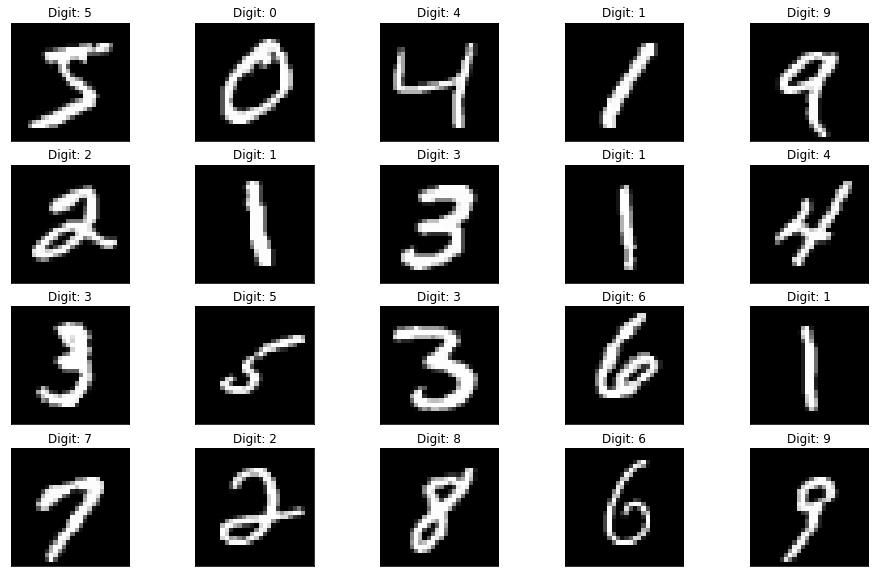

In [44]:
# Sample Images Visualisation
def plot_image(img, digit, plot, idx):
    plot.subplot(4, 5, idx + 1)
    plot.imshow(img, cmap=plt.get_cmap('gray'))
    plot.title(f"Digit: {digit}")
    plot.xticks([])
    plot.yticks([])

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
for i in range(20):
    plot_image(x_train[i], y_train[i], plt, i)

plt.show()

In [45]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras import Sequential

# Design Convolutional Neural Network
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

# Customize Learning Rate
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

2022-05-19 18:58:01.642004: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-19 18:58:01.642841: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-19 18:58:01.643630: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________

In [46]:
model.fit(x_train, y_train, epochs=7, batch_size=32)

Epoch 1/10


2022-05-19 18:58:11.709648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 21s 10ms/step - loss: 0.5119 - accuracy: 0.9377
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0745 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0548 - accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0437 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0324 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0314 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0252 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0218 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0211 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - los

2022-05-19 19:01:19.306243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


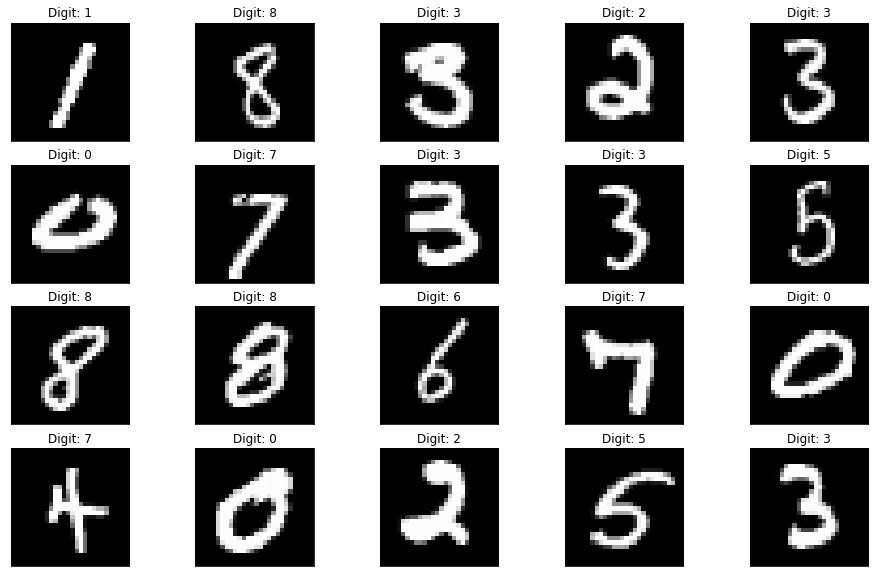

In [47]:
import random

plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_image(image, digit, plt, i)

plt.show()

In [48]:
from sklearn.metrics import accuracy_score

predictions = np.argmax(model.predict(x_test), axis=-1)
accuracy_score(y_test, predictions)

2022-05-19 19:01:27.149824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.9785